In [1]:
# Install GeoPandas (run this cell only if GeoPandas is not already installed)
# !pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

In [24]:
# Loading vector data (Shapefile and GeoJSON)
def load_vector_data():
    gdf_shapefile = gpd.read_file('./../cmu_lab_154743/vector_lab_data/geo_str_32647.shp')
    gdf_geojson = gpd.read_file('./../cmu_lab_154743/vector_lab_data/mea_on_32647.shp')
    return gdf_shapefile, gdf_geojson

In [25]:
# Load example data
gdf_shapefile, gdf_geojson = load_vector_data()

In [12]:
# Basic data exploration
def explore_data(gdf):
    print(gdf.head())
    print(gdf.describe())
    gdf.plot()
    plt.show()

     LENGTH STC_TYPE                         DESC_T             DESC_E  \
0    57.179      106            รอยเลื่อนและลายเส้น  Approximate fault   
1  3964.126      106            รอยเลื่อนและลายเส้น  Approximate fault   
2  1112.130      101  รอยเลื่อนที่ปรากฏอย่างเด่นชัด    Fault, accurate   
3   105.699      106            รอยเลื่อนและลายเส้น  Approximate fault   
4   222.466      101  รอยเลื่อนที่ปรากฏอย่างเด่นชัด    Fault, accurate   

                                            geometry  
0  LINESTRING (527563.844 2053554.63, 527541.424 ...  
1  LINESTRING (527541.424 2053502.03, 527535.913 ...  
2  LINESTRING (540986.218 2088350.771, 540985.95 ...  
3  LINESTRING (534537.182 2059903.162, 534523.141...  
4  LINESTRING (540739.245 2088022.22, 540605.572 ...  
            LENGTH
count    31.000000
mean   1522.855516
std    1445.289094
min      43.570000
25%     389.214000
50%    1099.284000
75%    2582.845500
max    4823.953000


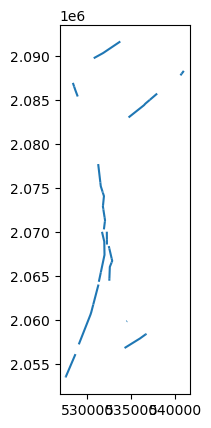

In [13]:
# Explore the data
explore_data(gdf_shapefile)

In [21]:
# Geometric operations
def geometric_operations(gdf):
    gdf['centroid'] = gdf['geometry'].centroid
    gdf['buffer'] = gdf['geometry'].buffer(1000)
    gdf['area'] = gdf['geometry'].area
    return gdf

In [22]:
# Perform geometric operations
gdf_with_operations = geometric_operations(gdf_shapefile)

print(gdf_with_operations.head())

     LENGTH STC_TYPE                         DESC_T             DESC_E  \
0    57.179      106            รอยเลื่อนและลายเส้น  Approximate fault   
1  3964.126      106            รอยเลื่อนและลายเส้น  Approximate fault   
2  1112.130      101  รอยเลื่อนที่ปรากฏอย่างเด่นชัด    Fault, accurate   
3   105.699      106            รอยเลื่อนและลายเส้น  Approximate fault   
4   222.466      101  รอยเลื่อนที่ปรากฏอย่างเด่นชัด    Fault, accurate   

                                            geometry  \
0  LINESTRING (527563.844 2053554.63, 527541.424 ...   
1  LINESTRING (527541.424 2053502.03, 527535.913 ...   
2  LINESTRING (540986.218 2088350.771, 540985.95 ...   
3  LINESTRING (534537.182 2059903.162, 534523.141...   
4  LINESTRING (540739.245 2088022.22, 540605.572 ...   

                         centroid  \
0   POINT (527552.634 2053528.33)   
1  POINT (527538.668 2053495.565)   
2  POINT (540986.084 2088350.593)   
3  POINT (534530.162 2059897.948)   
4  POINT (540672.408 2087933.306)

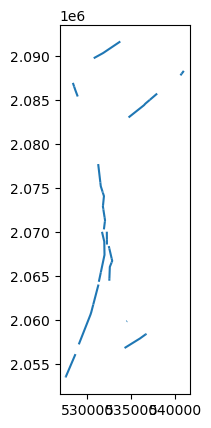

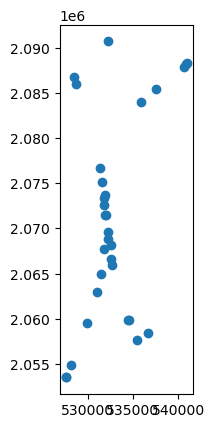

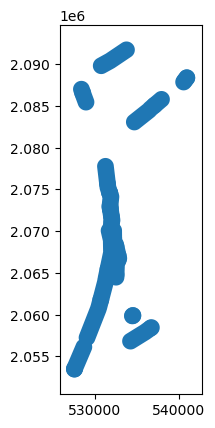

In [23]:
# display the data
gdf_with_operations.plot()
plt.show()

# display centroid
gdf_with_operations['centroid'].plot()
plt.show()

# display buffer
gdf_with_operations['buffer'].plot()
plt.show()


In [33]:
# Spatial relationships
def spatial_relationships(gdf1, gdf2):
    intersects = gdf1.intersects(gdf2.union_all)
    within = gdf1.within(gdf2.union_all)
    contains = gdf1.contains(gdf2.union_all)
    return intersects, within, contains

In [34]:
# Perform spatial relationships analysis
intersects, within, contains = spatial_relationships(gdf_shapefile, gdf_geojson)

TypeError: (<class 'geopandas.geoseries.GeoSeries'>, <class 'method'>)

In [43]:
# Data manipulation
def manipulate_data(gdf):
    gdf['new_column'] = gdf['geometry'].area
    gdf_filtered = gdf[gdf['new_column'] > 1000]
    return gdf_filtered

In [44]:
# Manipulate the data
gdf_filtered = manipulate_data(gdf_shapefile)

# Display hdf filtered
print(gdf_filtered.head())

Empty GeoDataFrame
Columns: [LENGTH, STC_TYPE, DESC_T, DESC_E, geometry, new_column]
Index: []


In [45]:
# Spatial joins
def spatial_joins(gdf1, gdf2):
    gdf_joined = gpd.sjoin(gdf1, gdf2, how='inner', op='intersects')
    return gdf_joined

In [46]:
# Perform spatial joins
gdf_joined = spatial_joins(gdf_shapefile, gdf_geojson)

TypeError: sjoin() got an unexpected keyword argument 'op'

In [50]:
# Coordinate Reference Systems (CRS)
def set_crs(gdf, crs="EPSG:32647"):
    gdf = gdf.set_crs(crs)
    return gdf

In [51]:
def reproject_crs(gdf, crs="EPSG:3857"):
    gdf = gdf.to_crs(crs)
    return gdf

In [53]:
# Set and reproject CRS
gdf_crs_set = set_crs(gdf_shapefile)
gdf_reprojected = reproject_crs(gdf_shapefile)

# Display CRS
print(gdf_crs_set.crs)
print(gdf_reprojected.crs)

EPSG:32647
EPSG:3857


In [54]:
# Saving data
def save_data(gdf, filepath, driver="ESRI Shapefile"):
    gdf.to_file(filepath, driver=driver)

In [55]:
# Save the data
save_data(gdf_shapefile, 'output_file.shp')

In [56]:
# Practical examples
def create_buffer(gdf, distance=10):
    gdf['buffer'] = gdf['geometry'].buffer(distance)
    return gdf

In [58]:
# Practical examples
gdf_buffer = create_buffer(gdf_shapefile)
# gdf_intersections = find_intersections(gdf_shapefile, gdf_geojson)
gdf_areas = calculate_areas(gdf_shapefile)

# display the data
gdf_buffer.plot()
plt.show()

# display the data
# gdf_intersections.plot()
# plt.show()

# display area data
print(gdf_areas.head())


NameError: name 'calculate_areas' is not defined

In [59]:
def find_intersections(gdf1, gdf2):
    intersections = gpd.overlay(gdf1, gdf2, how='intersection')
    return intersections

In [60]:
def calculate_areas(gdf):
    gdf['area'] = gdf['geometry'].area
    return gdf

In [61]:
# Advanced analysis
def overlay_operations(gdf1, gdf2, operation='union'):
    gdf_overlay = gpd.overlay(gdf1, gdf2, how=operation)
    return gdf_overlay

In [62]:
# Advanced analysis
gdf_overlay = overlay_operations(gdf_shapefile, gdf_geojson)

/var/folders/qm/p5vffjb56gvb80sz8bwjxy780000gn/T/ipykernel_44631/2229451019.py:3: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_overlay = gpd.overlay(gdf1, gdf2, how=operation)


In [63]:
# Visualization
def plot_data(gdf):
    gdf.plot()
    plt.show()

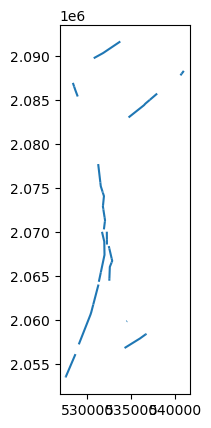

NameError: name 'customize_plot' is not defined

In [64]:
# Visualization
plot_data(gdf_shapefile)
customize_plot(gdf_shapefile, color='green', title='Customized Plot')

In [65]:
def customize_plot(gdf, color='blue', title='Geopandas Plot'):
    ax = gdf.plot(color=color)
    plt.title(title)
    plt.show()

In [66]:
# Case Study (Example code for case study analysis)
def case_study_analysis(gdf1, gdf2):
    # This is a placeholder for the case study analysis code
    # Example: Merging data and calculating new metrics
    gdf_merged = gpd.sjoin(gdf1, gdf2, how='inner', op='intersects')
    gdf_merged['new_metric'] = gdf_merged['attribute1'] / gdf_merged['attribute2']
    return gdf_merged

In [67]:
# Case study analysis
gdf_case_study = case_study_analysis(gdf_shapefile, gdf_geojson)

TypeError: sjoin() got an unexpected keyword argument 'op'

In [68]:
# Resources
resources = {
    "Official Documentation": "https://geopandas.org/",
    "Tutorials and Guides": [
        "GeoPandas Tutorials",
        "Online Courses"
    ]
}

resources

{'Official Documentation': 'https://geopandas.org/',
 'Tutorials and Guides': ['GeoPandas Tutorials', 'Online Courses']}